In [1]:
pip install pysm3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import healpy as hp
import pysm3
import pysm3.units as u
import os
import matplotlib.pyplot as plt

In [3]:
nside = 512  # Ajusta según la resolución deseada
frequency = 40 * u.GHz  # Frecuencia de observación (litebird es a 40)

In [4]:
# Crea un modelo del cielo con componentes de CMB, polvo y sincrotrónico
sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1", "s1"])  # c es el componente de CMB de pySM

# Obtiene la emisión en la frecuencia deseada
map_40GHz = sky.get_emission(frequency)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


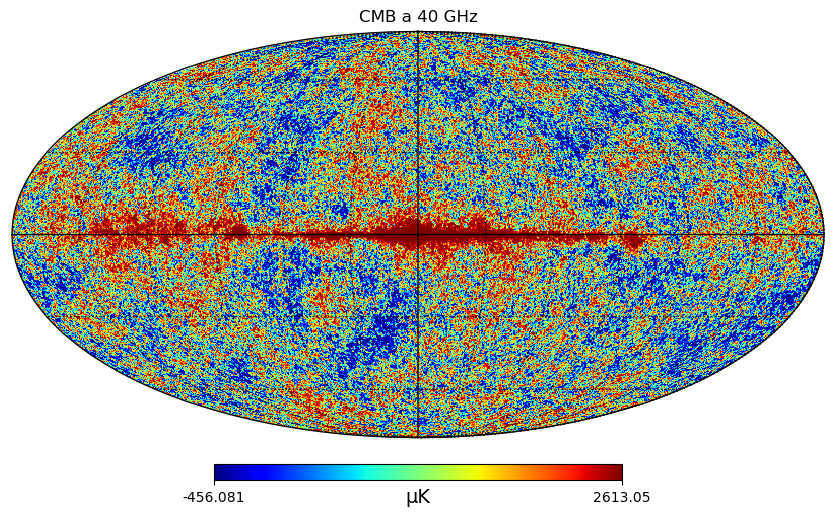

In [5]:
# Visualización usando Healpy
hp.mollview(map_40GHz[0], title="CMB a 40 GHz", unit="µK", norm="hist",  cmap = 'jet')
hp.graticule()

In [6]:
#Guardar el mapa en un archivo FITS
#hp.write_map("CMB_44GHz_with_Galaxies.fits", map_40GHz, overwrite=True)

In [7]:
# mapa es tu mapa CMB cargado
fwhm_degrees = 0.3
fwhm_radians = np.deg2rad(fwhm_degrees)

map_40GHz_smooth = hp.smoothing(map_40GHz[0], fwhm=fwhm_radians)

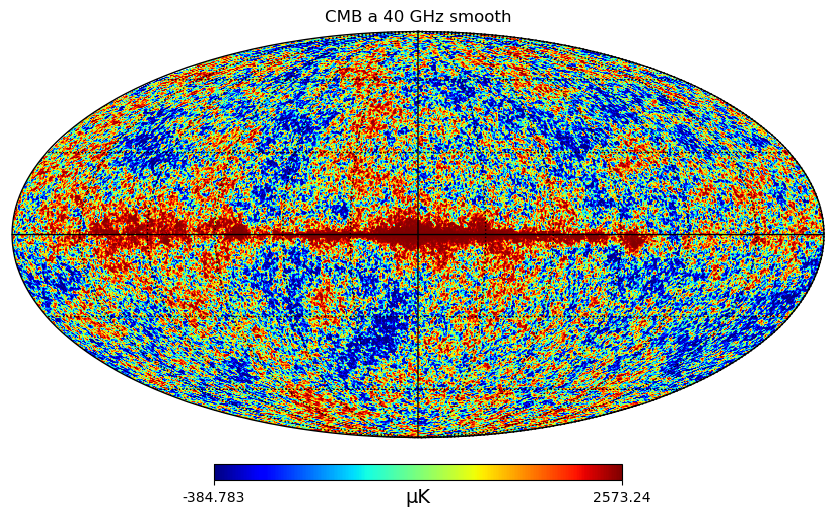

In [8]:
hp.mollview(map_40GHz_smooth, title="CMB a 40 GHz smooth", unit='µK', norm='hist', cmap = 'jet')
hp.graticule()

In [9]:
#parches de 64x64 para nside 512

In [10]:
nside = 512  # Ajusta según la resolución deseada
frequency = 40 * u.GHz  # Frecuencia de observación (LiteBIRD es a 40 GHz)

# Crea un modelo del cielo con componentes de CMB, polvo y sincrotrónico
sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1", "s1"])  # c es el componente de CMB de PySM

# Obtiene la emisión en la frecuencia deseada
map_40GHz = sky.get_emission(frequency)

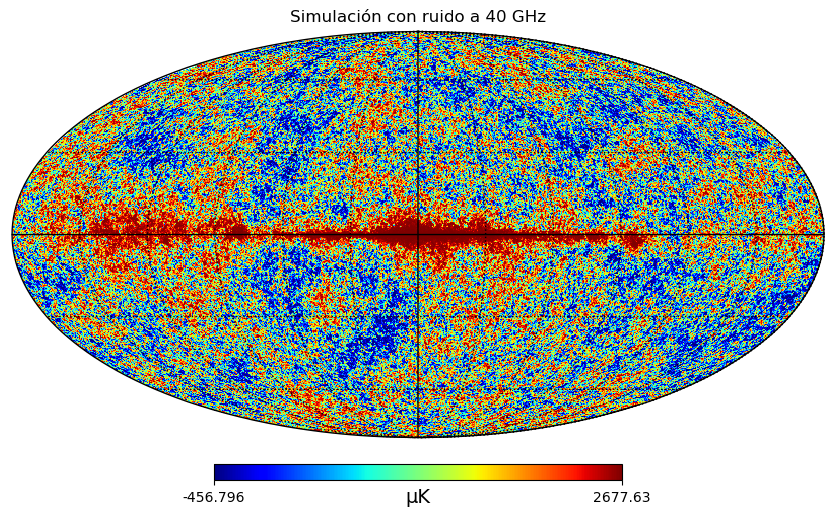

In [11]:
# Suma los tres mapas para obtener una simulación con ruido
sum_map = map_40GHz[0] + map_40GHz[1] + map_40GHz[2]

# Visualización usando Healpy
hp.mollview(sum_map, title="Simulación con ruido a 40 GHz", unit="µK", norm="hist", cmap='jet')
hp.graticule()

plt.show()

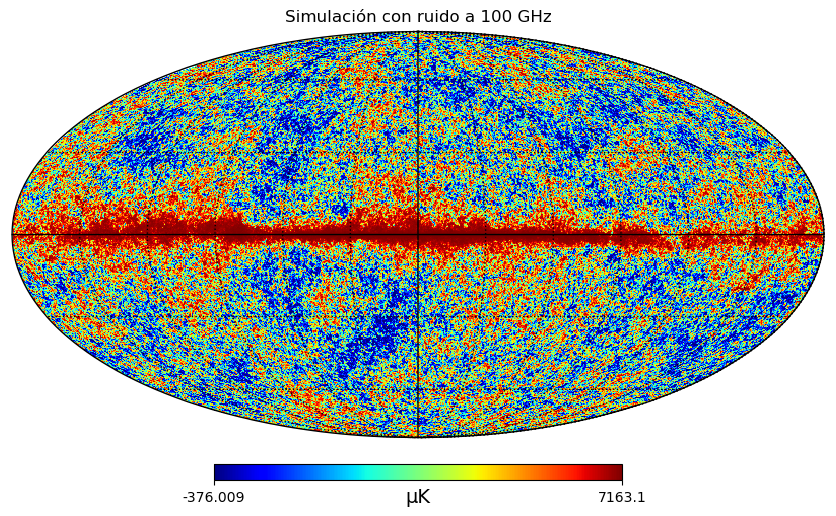

In [12]:
# Cambia la frecuencia de observación
frequency = 100 * u.GHz  # Frecuencia de observación, en este caso 100 GHz

# Obtiene la emisión en la nueva frecuencia deseada
map_100GHz = sky.get_emission(frequency)

# Suma los tres mapas para obtener una simulación con ruido
sum_map = map_100GHz[0] + map_100GHz[1] + map_100GHz[2]

# Visualización usando Healpy
hp.mollview(sum_map, title="Simulación con ruido a 100 GHz", unit="µK", norm="hist", cmap='jet')
hp.graticule()

plt.show()

In [20]:
def save_simulations(frequencies, nside=512, fwhm_degrees=0.125, output_dir="sims"):
    # Convertir FWHM de grados a radianes
    fwhm_radians = np.deg2rad(fwhm_degrees)
    
    # Crear el directorio de salida si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Crea un modelo del cielo con componentes de CMB, polvo y sincrotrónico
    sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1", "s1"])

    for freq in frequencies:
        frequency = freq * u.GHz  # Frecuencia de observación
        
        # Obtiene la emisión en la frecuencia deseada
        emission_map = sky.get_emission(frequency)
        
        # Suma los tres mapas para obtener una simulación con ruido
        #sum_map = emission_map[0] + emission_map[1] + emission_map[2]
        
        # Aplica el suavizado
        #smoothed_map = hp.smoothing(sum_map, fwhm=fwhm_radians)
        
        # Construye la ruta completa del archivo de salida
        filename = os.path.join(output_dir, f"sim_map_{freq}GHz.fits")
        
        # Guarda el mapa suavizado en un archivo FITS
        hp.write_map(filename, emission_map, overwrite=True)
        print(f"Guardado: {filename}")



In [21]:
# Ejemplo de uso
frequencies = [40, 50, 60, 68, 78, 89, 100, 119, 140, 166, 195, 235, 280, 337, 402]  # Array de frecuencias deseadas en GHz
save_simulations(frequencies)

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_40GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_50GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_60GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_68GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_78GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_89GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_100GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_119GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_140GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_166GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_195GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_235GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_280GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_337GHz.fits


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Guardado: sims/sim_map_402GHz.fits


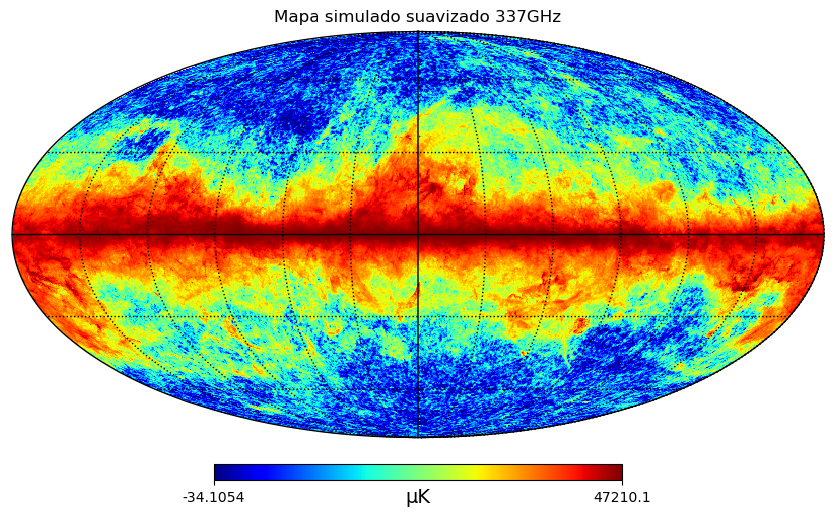

In [17]:
freq = "337"
filename = f"sims/sim_map_{freq}GHz.fits"
map_data = hp.read_map(filename)
# Visualización usando Healpy
hp.mollview(map_data, title=f"Mapa simulado suavizado {freq}GHz", unit="µK", norm="hist", cmap='jet')
hp.graticule()
plt.show()

In [3]:
# Crea un modelo del cielo con componentes de CMB, polvo y sincrotrónico
skypruebas = pysm3.Sky(nside=nside, preset_strings=["c1", "d1", "s1", "f1"])  # c es el componente de CMB de pySM

# Obtiene la emisión en la frecuencia deseada
map_pruebas = skypruebas.get_emission(frequency)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


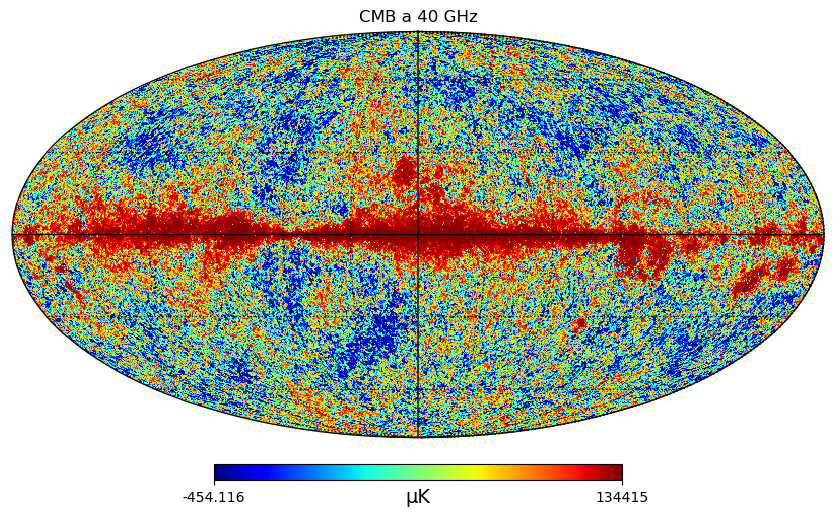

In [4]:
# Visualización c1
hp.mollview(map_pruebas[0], title="CMB a 40 GHz", unit="µK", norm="hist",  cmap = 'jet')
hp.graticule()

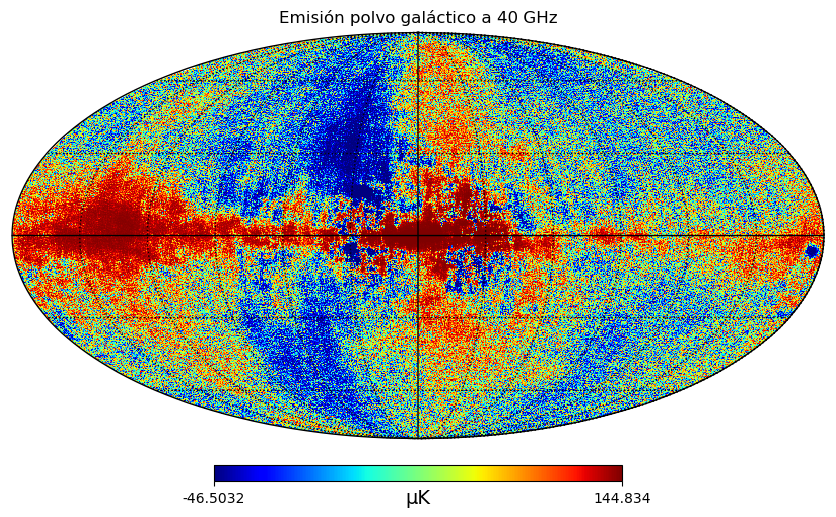

In [9]:
# Visualización d1
hp.mollview(map_pruebas[1], title="Emisión polvo galáctico a 40 GHz", unit="µK", norm="hist",  cmap = 'jet')
hp.graticule()

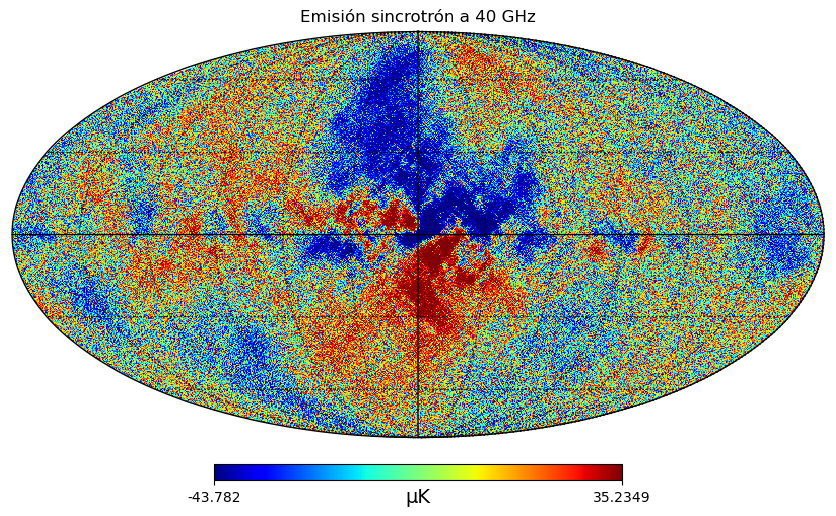

In [10]:
# Visualización s1
hp.mollview(map_pruebas[2], title="Emisión sincrotrón a 40 GHz", unit="µK", norm="hist",  cmap = 'jet')
hp.graticule()